In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('jan_2019_games_arenas_1_to_13.csv')
df

,timestamp,arena_id,tag,opp_tag,has_won,player_deck,opp_deck
0,2019-01-01 00:00:46,8,8L9GQVVUL,9QRV2V888,1.0,balloon_barbarian-barrel_elixir-collector_fire...,bomb-tower_executioner_ice-wizard_inferno-towe...
1,2019-01-01 00:02:00,13,92GLVGQU,9PVGG0JUQ,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,baby-dragon_bats_dart-goblin_electro-wizard_fl...
2,2019-01-01 00:02:21,12,8RPVVVRPV,JP0VC992,1.0,goblin-barrel_hog-rider_inferno-tower_minion-h...,bandit_battle-ram_electro-wizard_fireball_mini...
3,2019-01-01 00:03:12,12,Y0PQGY0R,2L0RUP82R,0.0,arrows_balloon_electro-wizard_ice-wizard_infer...,clone_executioner_fireball_giant-skeleton_mine...
4,2019-01-01 00:03:42,13,92GLVGQU,P2L989LCR,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,bats_clone_elixir-collector_executioner_golem_...
...,...,...,...,...,...,...,...
16129083,2019-01-31 22:14:34,2,P9J2VV29J,PP0U2QRRL,1.0,archers_fireball_giant_knight_mini-pekka_muske...,archers_arrows_fireball_hog-rider_knight_mini-...
16129084,2019-01-31 22:19:07,2,P9J2VV29J,PP0CRP9CV,0.0,archers_fireball_giant_goblin-hut_knight_mini-...,arrows_fireball_giant_knight_mini-pekka_musket...
16129085,2019-01-31 22:22:54,2,P9J2VV29J,PY09QU28Y,1.0,archers_fireball_giant_goblins_knight_mini-pek...,arrows_fireball_giant_goblin-hut_hog-rider_min...
16129086,2019-01-31 22:28:00,2,P9J2VV29J,9UG28GQ2U,0.0,archers_fireball_giant_goblins_knight_mini-pek...,baby-dragon_bomber_fireball_giant_hog-rider_mi...


In [2]:
player_deck = set()
for v in df['player_deck'].values:
    for elem in v.split('_'):
        player_deck.add(elem)
player_deck

{'archers',
 'arrows',
 'baby-dragon',
 'balloon',
 'bandit',
 'barbarian-barrel',
 'barbarian-hut',
 'barbarians',
 'bats',
 'battle-ram',
 'bomb-tower',
 'bomber',
 'bowler',
 'cannon',
 'cannon-cart',
 'clone',
 'dark-prince',
 'dart-goblin',
 'electro-dragon',
 'electro-wizard',
 'elite-barbarians',
 'elixir-collector',
 'executioner',
 'fire-spirits',
 'fireball',
 'flying-machine',
 'freeze',
 'furnace',
 'giant',
 'giant-skeleton',
 'giant-snowball',
 'goblin-barrel',
 'goblin-gang',
 'goblin-giant',
 'goblin-hut',
 'goblins',
 'golem',
 'graveyard',
 'guards',
 'heal',
 'hog-rider',
 'hunter',
 'ice-golem',
 'ice-spirit',
 'ice-wizard',
 'inferno-dragon',
 'inferno-tower',
 'knight',
 'lava-hound',
 'lightning',
 'lumberjack',
 'magic-archer',
 'mega-knight',
 'mega-minion',
 'miner',
 'mini-pekka',
 'minion-horde',
 'minions',
 'mirror',
 'mortar',
 'musketeer',
 'night-witch',
 'pekka',
 'poison',
 'prince',
 'princess',
 'rage',
 'ram-rider',
 'rascals',
 'rocket',
 'royal-g

In [4]:
for elem in player_deck:
    df[elem] = df['player_deck'].map(lambda x: elem in x)
df

,timestamp,arena_id,tag,opp_tag,has_won,player_deck,opp_deck,hog-rider,royal-recruits,minion-horde,...,tombstone,balloon,lava-hound,barbarian-barrel,executioner,lumberjack,dart-goblin,clone,elixir-collector,the-log
0,2019-01-01 00:00:46,8,8L9GQVVUL,9QRV2V888,1.0,balloon_barbarian-barrel_elixir-collector_fire...,bomb-tower_executioner_ice-wizard_inferno-towe...,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,2019-01-01 00:02:00,13,92GLVGQU,9PVGG0JUQ,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,baby-dragon_bats_dart-goblin_electro-wizard_fl...,False,False,False,...,False,True,False,True,False,True,False,False,False,False
2,2019-01-01 00:02:21,12,8RPVVVRPV,JP0VC992,1.0,goblin-barrel_hog-rider_inferno-tower_minion-h...,bandit_battle-ram_electro-wizard_fireball_mini...,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:03:12,12,Y0PQGY0R,2L0RUP82R,0.0,arrows_balloon_electro-wizard_ice-wizard_infer...,clone_executioner_fireball_giant-skeleton_mine...,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,2019-01-01 00:03:42,13,92GLVGQU,P2L989LCR,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,bats_clone_elixir-collector_executioner_golem_...,False,False,False,...,False,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129083,2019-01-31 22:14:34,2,P9J2VV29J,PP0U2QRRL,1.0,archers_fireball_giant_knight_mini-pekka_muske...,archers_arrows_fireball_hog-rider_knight_mini-...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16129084,2019-01-31 22:19:07,2,P9J2VV29J,PP0CRP9CV,0.0,archers_fireball_giant_goblin-hut_knight_mini-...,arrows_fireball_giant_knight_mini-pekka_musket...,False,False,False,...,True,False,False,False,False,False,False,False,False,False
16129085,2019-01-31 22:22:54,2,P9J2VV29J,PY09QU28Y,1.0,archers_fireball_giant_goblins_knight_mini-pek...,arrows_fireball_giant_goblin-hut_hog-rider_min...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16129086,2019-01-31 22:28:00,2,P9J2VV29J,9UG28GQ2U,0.0,archers_fireball_giant_goblins_knight_mini-pek...,baby-dragon_bomber_fireball_giant_hog-rider_mi...,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
import itertools

df_jan = df[(df.timestamp.map(lambda x: x[5:7] == '01')) & (df.timestamp.map(lambda x: x[:4] == '2019'))].iloc[:100]
usage_1 = pd.DataFrame()

for elems in list(itertools.combinations(player_deck, 1)):
    df_local = df_jan
    for elem in elems:
        df_local = df_local[df_local[elem]]
    usage = len(df_local) / len(df_jan)
    usage_1 = pd.concat([usage_1, pd.DataFrame({'card': "".join(elems), 'usage': usage}, index=[0])])

usage_1 = usage_1.sort_values('usage', ascending=False)
usage_1

,card,usage
0,wizard,0.57
0,prince,0.35
0,valkyrie,0.33
0,giant,0.31
0,the-log,0.30
...,...,...
0,furnace,0.00
0,mirror,0.00
0,goblin-giant,0.00
0,giant-snowball,0.00


In [10]:
usage_2 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_1.iloc[:10].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_2 = pd.concat([usage_2, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_2 = usage_2.sort_values('usage', ascending=False)
usage_2.drop_duplicates(subset='usage', inplace=True)
usage_2

,card,usage
0,wizard_valkyrie,0.28
0,giant_wizard,0.25
0,prince_wizard,0.23
0,lumberjack_wizard,0.20
0,prince_witch,0.19
0,giant_giant-skeleton,0.18
0,giant_the-log,0.16
0,wizard_giant-skeleton,0.15
0,wizard_zap,0.14
0,the-log_zap,0.13


In [11]:
usage_3 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_2.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_3 = pd.concat([usage_3, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_3 = usage_3.sort_values('usage', ascending=False)
usage_3.drop_duplicates(subset='usage', inplace=True)
usage_3

,card,usage
0,prince_wizard_witch,0.19
0,wizard_valkyrie_the-log,0.15
0,giant_wizard_valkyrie,0.14
0,giant_wizard_the-log,0.12
0,giant_wizard_lumberjack,0.11
0,giant_wizard_ice-wizard,0.10
0,prince_wizard_hunter,0.09
0,lumberjack_wizard_tornado,0.08
0,prince_wizard_valkyrie,0.07
0,prince_witch_executioner,0.06


In [12]:
usage_4 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_3.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_4 = pd.concat([usage_4, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_4 = usage_4.sort_values('usage', ascending=False)
usage_4.drop_duplicates(subset='usage', inplace=True)
usage_4

,card,usage
0,prince_wizard_witch_baby-dragon,0.12
0,giant_wizard_the-log_valkyrie,0.10
0,prince_wizard_witch_hunter,0.09
0,giant_wizard_lumberjack_ice-wizard,0.08
0,wizard_valkyrie_the-log_ice-wizard,0.07
0,giant_wizard_the-log_tornado,0.06
0,giant_wizard_valkyrie_tornado,0.05
0,wizard_valkyrie_the-log_skeleton-army,0.04
0,giant_wizard_the-log_miner,0.03
0,prince_wizard_witch_minion-horde,0.02


In [13]:
usage_5 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_4.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_5 = pd.concat([usage_5, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_5 = usage_5.sort_values('usage', ascending=False)
usage_5.drop_duplicates(subset='usage', inplace=True)
usage_5

,card,usage
0,prince_wizard_witch_baby-dragon_hunter,0.09
0,giant_wizard_lumberjack_ice-wizard_tornado,0.08
0,wizard_valkyrie_the-log_ice-wizard_tornado,0.05
0,prince_wizard_witch_baby-dragon_executioner,0.04
0,giant_wizard_the-log_valkyrie_dart-goblin,0.03
0,wizard_valkyrie_the-log_ice-wizard_fireball,0.02
0,prince_wizard_witch_hunter_graveyard,0.01
0,wizard_valkyrie_the-log_ice-wizard_fire-spirits,0.00


In [5]:
importance = pd.DataFrame()
for elem in player_deck:
    win_ratio = df[df[elem]]["has_won"].mean()
    usage = len(df[df[elem]]) / len(df)
    importance = pd.concat([importance, pd.DataFrame({'card': elem, 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance = importance[importance.usage > .01]
importance.sort_values('win_ratio', ascending=False)

,card,win_ratio,usage
0,goblin-gang,0.521111,0.154237
0,elite-barbarians,0.519560,0.101614
0,barbarians,0.518708,0.127058
0,zap,0.516569,0.319740
0,electro-wizard,0.515986,0.144399
...,...,...,...
0,royal-hogs,0.473018,0.019120
0,ice-golem,0.472495,0.035234
0,barbarian-hut,0.464237,0.013065
0,skeletons,0.458574,0.024875


In [15]:
importance_2 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_2 = pd.concat([importance_2, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_2 = importance_2.sort_values('win_ratio', ascending=False)
importance_2.drop_duplicates(subset='win_ratio', inplace=True)
importance_2 = importance_2[importance_2.usage > .01]
importance_2

,card,win_ratio,usage
0,night-witch_elite-barbarians,1.000000,0.070
0,furnace_lumberjack,0.875000,0.204
0,night-witch_battle-ram,0.833333,0.055
0,poison_bandit,0.818182,0.079
0,lava-hound_inferno-tower,0.812500,0.122
...,...,...,...
0,mirror_ice-spirit,0.250000,0.052
0,furnace_goblin-hut,0.214286,0.017
0,knight_three-musketeers,0.166667,0.021
0,spear-goblins_inferno-dragon,0.000000,0.150


In [16]:
importance_3 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_2.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_3 = pd.concat([importance_3, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_3 = importance_3.sort_values('win_ratio', ascending=False)
importance_3.drop_duplicates(subset='win_ratio', inplace=True)
importance_3 = importance_3[importance_3.usage > .01]
importance_3

,card,win_ratio,usage
0,furnace_lumberjack_witch,1.000000,0.317
0,spear-goblins_witch_prince,0.900000,0.349
0,poison_battle-ram_arrows,0.833333,0.149
0,poison_bandit_electro-wizard,0.818182,0.144
0,furnace_lumberjack_arrows,0.800000,0.149
0,poison_battle-ram_minions,0.777778,0.100
0,poison_golem_lumberjack,0.750000,0.204
0,lava-hound_inferno-tower_musketeer,0.625000,0.120
0,spear-goblins_witch_pekka,0.500000,0.183
0,witch_elixir-collector_giant,0.000000,0.224


In [17]:
importance_4 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_3.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_4 = pd.concat([importance_4, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_4 = importance_4.sort_values('win_ratio', ascending=False)
importance_4.drop_duplicates(subset='win_ratio', inplace=True)
importance_4 = importance_4[importance_4.usage > .01]
importance_4

,card,win_ratio,usage
0,spear-goblins_witch_prince_zap,1.000000,0.345
0,poison_battle-ram_arrows_witch,0.833333,0.317
0,poison_bandit_electro-wizard_zap,0.818182,0.345
0,furnace_lumberjack_arrows_inferno-dragon,0.800000,0.150
0,poison_bandit_electro-wizard_royal-ghost,0.777778,0.052
0,spear-goblins_witch_prince_balloon,0.750000,0.186
0,poison_golem_lumberjack_night-witch,0.666667,0.072
0,lava-hound_inferno-tower_musketeer_baby-dragon,0.625000,0.222
0,spear-goblins_witch_pekka_bomber,0.500000,0.049
0,witch_elixir-collector_giant_royal-giant,0.000000,0.029


In [18]:
importance_5 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_4.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_5 = pd.concat([importance_5, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_5 = importance_5.sort_values('win_ratio', ascending=False)
importance_5.drop_duplicates(subset='win_ratio', inplace=True)
importance_5 = importance_5[importance_5.usage > .01]
importance_5

,card,win_ratio,usage
0,furnace_lumberjack_arrows_inferno-dragon_witch,1.000000,0.317
0,poison_battle-ram_arrows_witch_skeleton-army,0.833333,0.307
0,poison_bandit_electro-wizard_zap_pekka,0.818182,0.183
0,poison_bandit_electro-wizard_royal-ghost_pekka,0.777778,0.183
0,spear-goblins_witch_prince_balloon_giant-skeleton,0.750000,0.129
0,furnace_lumberjack_arrows_inferno-dragon_gobli...,0.666667,0.109
0,lava-hound_inferno-tower_musketeer_baby-dragon...,0.625000,0.160
0,spear-goblins_witch_pekka_bomber_mini-pekka,0.500000,0.089
0,witch_elixir-collector_giant_royal-giant_wizard,0.000000,0.600
0,poison_bandit_electro-wizard_zap_witch,NaN,0.317


In [35]:
daily_mean = df.groupby(df.timestamp.map(lambda x: x[:10])).mean()

In [36]:
std = daily_mean.std()

In [39]:
std.sort_values(ascending=True)[:10]

bomb-tower         0.000434
cannon-cart        0.000448
zappies            0.000471
goblin-giant       0.000487
royal-recruits     0.000562
barbarian-hut      0.001007
electro-dragon     0.001074
giant-snowball     0.001133
x-bow              0.001294
skeleton-barrel    0.001405
dtype: float64

In [40]:
std.sort_values(ascending=False)[:10]

arena_id            0.315104
prince              0.023993
zap                 0.019244
skeleton-army       0.017993
freeze              0.016105
bats                0.014500
baby-dragon         0.014225
barbarian-barrel    0.012818
goblin-gang         0.012814
wizard              0.012185
dtype: float64

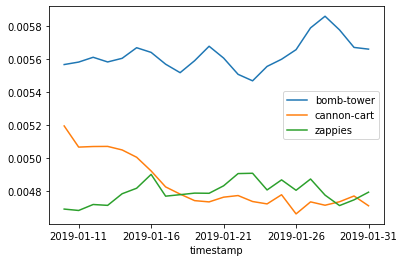

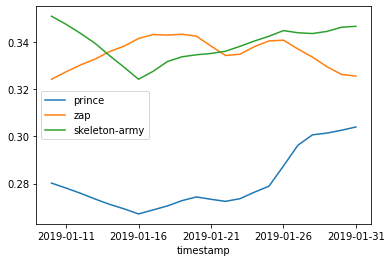

In [49]:
import matplotlib.pyplot as plt
daily_mean['bomb-tower'].rolling(10).mean().plot()
daily_mean['cannon-cart'].rolling(10).mean().plot()
daily_mean['zappies'].rolling(10).mean().plot()
plt.legend()
plt.show()
daily_mean['prince'].rolling(10).mean().plot()
daily_mean['zap'].rolling(10).mean().plot()
daily_mean['skeleton-army'].rolling(10).mean().plot()
plt.legend()
plt.show()

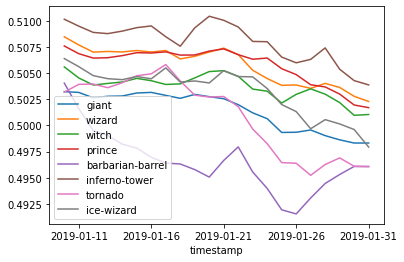

In [61]:
stds = pd.DataFrame()

for elem in usage_1.card.iloc[:20]:
    daily_mean = df[['has_won', 'timestamp', elem]][df[elem]].groupby(df.timestamp.map(lambda x: x[:10])).has_won.mean()
    std = daily_mean.std()
    stds = pd.concat([stds, pd.DataFrame({'std': std, 'card': elem}, index=[0])])

stds_small = stds.sort_values(by='std', ascending=True).iloc[:4].card.values.tolist()
stds_big = stds.sort_values(by='std', ascending=False).iloc[:4].card.values.tolist()

for elem in stds_small + stds_big:
    daily_mean = df[['has_won', 'timestamp', elem]][df[elem]].groupby(df.timestamp.map(lambda x: x[:10])).has_won.mean()
    daily_mean.rolling(10).mean().plot(label=elem)
plt.legend()
plt.show()

In [30]:
usage_arena = pd.DataFrame()
grouped = df.groupby('arena_id')

for elem in usage_1.card.iloc[:5]:
    usage = grouped.apply(lambda x: x[elem].mean())
    win = grouped.apply(lambda x: len(x[x[elem] & x['has_won']]) / len(x))
    d = pd.concat([usage.to_frame().T.add_prefix('usage_'), win.to_frame().T.add_prefix('win_')], axis=1)
    d['card'] = elem
    usage_arena = pd.concat([usage_arena, d])

usage_arena.set_index('card', inplace=True)
usage_arena

arena_id,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,usage_10,...,win_4,win_5,win_6,win_7,win_8,win_9,win_10,win_11,win_12,win_13
card,,,,,,,,,,,,,,,,,,,,,
wizard,0.047626,0.014510,0.018461,0.088355,0.371359,0.461835,0.537189,0.573502,0.599345,0.610167,...,0.047128,0.206420,0.257497,0.300319,0.318785,0.331965,0.336184,0.346876,0.342421,0.280559
prince,0.396167,0.558230,0.588458,0.512310,0.426007,0.347576,0.345868,0.324296,0.326313,0.321008,...,0.285883,0.233551,0.189624,0.190885,0.180396,0.180224,0.176210,0.165908,0.151561,0.122987
valkyrie,0.043907,0.342715,0.365461,0.362844,0.361000,0.379194,0.363800,0.357006,0.353519,0.337022,...,0.214769,0.207137,0.212871,0.205398,0.200810,0.198242,0.187108,0.176937,0.172907,0.145173
giant,0.713387,0.546195,0.416250,0.303547,0.253202,0.230896,0.242797,0.242216,0.239559,0.223278,...,0.164489,0.139051,0.126639,0.132718,0.131839,0.129867,0.119991,0.119622,0.122548,0.114336
the-log,0.027889,0.008645,0.003158,0.005301,0.009175,0.027406,0.062361,0.084488,0.118333,0.158611,...,0.003223,0.005191,0.015224,0.035950,0.048292,0.067007,0.088766,0.110710,0.124453,0.129964


In [34]:
usage_arena.std(axis=0).sort_values(ascending=False)

arena_id
usage_1     0.303631
usage_2     0.271724
usage_3     0.257898
usage_4     0.206346
usage_8     0.178255
usage_9     0.177526
usage_7     0.174382
usage_10    0.172762
usage_11    0.172288
usage_6     0.168259
usage_5     0.165985
usage_12    0.164168
win_1       0.163507
win_2       0.144480
win_3       0.139868
usage_13    0.134691
win_4       0.117001
win_8       0.099098
win_9       0.098357
win_7       0.097449
win_11      0.095422
win_10      0.095354
win_6       0.093876
win_5       0.092434
win_12      0.091634
win_13      0.069105
dtype: float64

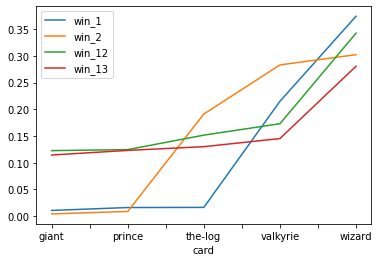

In [43]:
usage_arena['win_1'].sort_values().plot()
usage_arena['win_2'].sort_values().plot()
usage_arena['win_12'].sort_values().plot()
usage_arena['win_13'].sort_values().plot()
plt.legend()
plt.show()

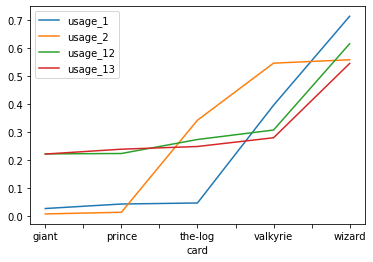

In [44]:
usage_arena['usage_1'].sort_values().plot()
usage_arena['usage_2'].sort_values().plot()
usage_arena['usage_12'].sort_values().plot()
usage_arena['usage_13'].sort_values().plot()
plt.legend()
plt.show()

In [46]:
grouped = df.groupby('tag').mean()[player_deck]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(grouped)
centroids = kmeans.cluster_centers_
print(centroids)

/tmp/ipykernel_5394/3064879380.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  grouped = df.groupby('tag').mean()[player_deck]


[[0.20420261 0.00391351 0.40191757 0.01882309 0.02803961 0.05759098
  0.30283928 0.03693411 0.09323237 0.01433326 0.02058379 0.19670322
  0.17426471 0.05049641 0.03675535 0.40317651 0.17472581 0.68585565
  0.06370503 0.0529113  0.02095291 0.07177616 0.06801782 0.18322095
  0.02557729 0.09406545 0.0338064  0.10678745 0.10073239 0.00687778
  0.06643122 0.00554147 0.00832405 0.01213051 0.03323705 0.46154867
  0.12271317 0.00522487 0.05893446 0.01359378 0.10785055 0.03462331
  0.21626705 0.09036789 0.09224744 0.04664548 0.00853481 0.04361132
  0.36891306 0.05360696 0.00471265 0.00452108 0.02448011 0.08463665
  0.3046834  0.00722211 0.05531493 0.09312234 0.00475233 0.00392367
  0.03427111 0.05814694 0.00474357 0.005042   0.05791311 0.0936951
  0.01060027 0.00192578 0.65494039 0.21822184 0.10195545 0.05268975
  0.00132235 0.02056677 0.23065722 0.01327485 0.05937221 0.00215233
  0.0185872  0.03271745 0.01301082 0.33710439 0.02211961 0.10569066
  0.06302218 0.12419462 0.02592916 0.06960685 0.0

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(grouped)

array([68, 17, 54, 36, 16])

In [51]:
pca.components_.argsort(axis=1)[:, -5:]

array([[81, 15,  2, 35, 68],
       [28, 18, 16, 49, 17],
       [12, 18,  8, 28, 54],
       [ 2, 25, 74,  0, 36],
       [44,  8, 70, 54, 16]])

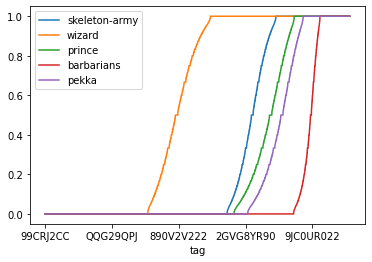

In [54]:
for card_id in pca.components_.argsort(axis=1)[:, -1]:
    grouped.iloc[:, card_id].sort_values().plot()
plt.legend()
plt.show()